# Import relevent packages

In [1]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import sklearn as sk
import geopandas as gpd

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, RobustScaler,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier


import matplotlib.pyplot as plt
import seaborn as sns

import random
random.seed(123)

In [2]:
#read in the data
df=pd.read_csv("uk_airbnb_cleaned.csv")
df

,Unnamed: 0,id,WD19NM,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,Income Deprivation Affecting Older People (IDAOPI) Score (rate),Children and Young People Sub-domain Score,Adult Skills Sub-domain Score,Geographical Barriers Sub-domain Score,Wider Barriers Sub-domain Score,Indoors Sub-domain Score,Outdoors Sub-domain Score,Local authority code,Median Price,Local authority name
0,0,27563570,Ancoats & Beswick,Manchester,53.48437,-2.23440,Entire apartment,Entire home/apt,16,3.0,...,0.344681,0.170500,0.344784,-0.559688,2.733443,0.507060,0.449550,E08000003,"234,750",Manchester
1,1,38428583,Chorlton,Manchester,53.44348,-2.27704,Private room in house,Private room,16,3.0,...,0.344681,0.170500,0.344784,-0.559688,2.733443,0.507060,0.449550,E08000003,"325,000",Manchester
2,2,40700904,Ancoats & Beswick,Manchester,53.48981,-2.23129,Entire apartment,Entire home/apt,16,3.0,...,0.344681,0.170500,0.344784,-0.559688,2.733443,0.507060,0.449550,E08000003,"234,750",Manchester
3,3,35818838,Cheetham,Manchester,53.50083,-2.24273,Private room in apartment,Private room,16,3.0,...,0.344681,0.170500,0.344784,-0.559688,2.733443,0.507060,0.449550,E08000003,"139,000",Manchester
4,4,19871804,Moss Side,Manchester,53.45199,-2.24554,Private room in house,Private room,16,2.0,...,0.344681,0.170500,0.344784,-0.559688,2.733443,0.507060,0.449550,E08000003,"145,000",Manchester
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,1731,43335900,Oldham,Manchester,53.54112,-2.11639,Private room in serviced apartment,Private room,1,1.0,...,0.221241,0.264291,0.402277,-0.469305,-1.153610,0.467752,0.136199,E08000004,"87,500",Oldham
4851,1732,31168412,Oldham,Manchester,53.58521,-2.09170,Private room in house,Private room,1,2.0,...,0.221241,0.264291,0.402277,-0.469305,-1.153610,0.467752,0.136199,E08000004,"87,500",Oldham
4852,1733,31413465,Oldham,Manchester,53.57497,-2.09419,Private room in house,Private room,1,1.0,...,0.221241,0.264291,0.402277,-0.469305,-1.153610,0.467752,0.136199,E08000004,"87,500",Oldham
4853,1734,42651877,Oldham,Manchester,53.52122,-2.13118,Private room in townhouse,Private room,1,1.0,...,0.221241,0.264291,0.402277,-0.469305,-1.153610,0.467752,0.136199,E08000004,"87,500",Oldham


In [3]:
df['Median Price'] = df['Median Price'].str.replace(',', '').astype(float) #remove the comma from price

In [4]:
df.corr() #quick check of correlations

,Unnamed: 0,id,latitude,longitude,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,...,Living Environment Score,Income Deprivation Affecting Children Index (IDACI) Score (rate),Income Deprivation Affecting Older People (IDAOPI) Score (rate),Children and Young People Sub-domain Score,Adult Skills Sub-domain Score,Geographical Barriers Sub-domain Score,Wider Barriers Sub-domain Score,Indoors Sub-domain Score,Outdoors Sub-domain Score,Median Price
Unnamed: 0,1.000000,-0.174694,-0.236704,-0.159256,-0.597812,-0.247209,-0.382315,-0.190435,0.006147,-0.080382,...,0.107678,0.007620,0.102948,-0.000901,-0.256911,-0.309191,0.276179,0.139677,0.116018,0.203686
id,-0.174694,1.000000,-0.072222,-0.090717,0.072592,-0.005971,0.092854,0.033682,-0.002576,-0.026564,...,-0.181476,-0.135349,-0.185055,0.004541,-0.037426,0.160349,-0.146476,-0.176766,-0.160587,-0.037679
latitude,-0.236704,-0.072222,1.000000,0.886060,0.036107,0.060586,0.025769,-0.025913,0.003573,0.060691,...,0.476497,0.379093,0.476439,-0.365227,0.609878,0.023226,-0.239492,0.397839,0.363410,-0.642869
longitude,-0.159256,-0.090717,0.886060,1.000000,0.049247,0.053389,0.020543,-0.023976,0.013127,0.057017,...,0.571091,0.417796,0.505190,-0.263666,0.578298,-0.106890,-0.113082,0.560332,0.428088,-0.559849
accommodates,-0.597812,0.072592,0.036107,0.049247,1.000000,0.441004,0.647419,0.316346,-0.004598,0.103294,...,0.093596,0.080656,0.085804,0.035044,0.049639,-0.070421,0.068475,0.087284,0.091692,-0.012909
bathrooms,-0.247209,-0.005971,0.060586,0.053389,0.441004,1.000000,0.382830,0.174924,0.020745,0.028462,...,0.065563,0.058454,0.061269,0.006043,0.057881,-0.018564,0.024281,0.056277,0.066383,-0.019631
bedrooms,-0.382315,0.092854,0.025769,0.020543,0.647419,0.382830,1.000000,0.223168,0.013370,0.037298,...,0.018560,0.028496,0.020712,0.018476,0.035615,0.004322,0.007108,0.010428,0.021301,-0.017742
price,-0.190435,0.033682,-0.025913,-0.023976,0.316346,0.174924,0.223168,1.000000,0.001392,0.045452,...,-0.026698,-0.026246,-0.030000,-0.010716,-0.028436,0.024218,-0.004402,-0.021958,-0.019893,0.039394
minimum_nights,0.006147,-0.002576,0.003573,0.013127,-0.004598,0.020745,0.013370,0.001392,1.000000,-0.004914,...,-0.012671,-0.013699,-0.011445,-0.011199,-0.016669,0.016754,-0.011198,-0.013657,-0.015003,0.012441
maximum_nights,-0.080382,-0.026564,0.060691,0.057017,0.103294,0.028462,0.037298,0.045452,-0.004914,1.000000,...,0.082257,0.085973,0.086992,0.020779,0.061860,-0.064451,0.052571,0.069070,0.089301,-0.053018


# Data Clean

In [5]:
df=pd.get_dummies(df, columns=['room_type'])  #OHE the room type and area names. Also convert t/f, to binary
df=df.replace({'t':1, 'f': 0})

In [6]:
df

,Unnamed: 0,id,WD19NM,city,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,...,Wider Barriers Sub-domain Score,Indoors Sub-domain Score,Outdoors Sub-domain Score,Local authority code,Median Price,Local authority name,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,27563570,Ancoats & Beswick,Manchester,53.48437,-2.23440,Entire apartment,16,3.0,4.0,...,2.733443,0.507060,0.449550,E08000003,234750.0,Manchester,1,0,0,0
1,1,38428583,Chorlton,Manchester,53.44348,-2.27704,Private room in house,16,3.0,6.0,...,2.733443,0.507060,0.449550,E08000003,325000.0,Manchester,0,0,1,0
2,2,40700904,Ancoats & Beswick,Manchester,53.48981,-2.23129,Entire apartment,16,3.0,3.0,...,2.733443,0.507060,0.449550,E08000003,234750.0,Manchester,1,0,0,0
3,3,35818838,Cheetham,Manchester,53.50083,-2.24273,Private room in apartment,16,3.0,6.0,...,2.733443,0.507060,0.449550,E08000003,139000.0,Manchester,0,0,1,0
4,4,19871804,Moss Side,Manchester,53.45199,-2.24554,Private room in house,16,2.0,4.0,...,2.733443,0.507060,0.449550,E08000003,145000.0,Manchester,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,1731,43335900,Oldham,Manchester,53.54112,-2.11639,Private room in serviced apartment,1,1.0,1.0,...,-1.153610,0.467752,0.136199,E08000004,87500.0,Oldham,0,0,1,0
4851,1732,31168412,Oldham,Manchester,53.58521,-2.09170,Private room in house,1,2.0,1.0,...,-1.153610,0.467752,0.136199,E08000004,87500.0,Oldham,0,0,1,0
4852,1733,31413465,Oldham,Manchester,53.57497,-2.09419,Private room in house,1,1.0,1.0,...,-1.153610,0.467752,0.136199,E08000004,87500.0,Oldham,0,0,1,0
4853,1734,42651877,Oldham,Manchester,53.52122,-2.13118,Private room in townhouse,1,1.0,1.0,...,-1.153610,0.467752,0.136199,E08000004,87500.0,Oldham,0,0,1,0


In [7]:
df.describe()

,Unnamed: 0,id,latitude,longitude,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,...,Adult Skills Sub-domain Score,Geographical Barriers Sub-domain Score,Wider Barriers Sub-domain Score,Indoors Sub-domain Score,Outdoors Sub-domain Score,Median Price,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,4855.000000,4.855000e+03,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,...,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000
mean,1350.102369,2.765535e+07,52.902060,-2.347403,3.419156,1.239959,1.572194,82.759835,2.961071,705.474150,...,0.324979,-0.416183,1.402596,0.363498,0.125379,234874.907106,0.503399,0.018950,0.466735,0.010917
std,887.576954,1.372175e+07,0.908527,0.169567,2.575039,0.573941,1.346794,167.871698,12.472678,523.959853,...,0.041146,0.134076,1.441226,0.151050,0.287115,87257.998487,0.500040,0.136361,0.498944,0.103921
min,0.000000,3.952400e+04,51.405240,-2.708970,1.000000,0.000000,0.000000,9.000000,1.000000,1.000000,...,0.247007,-0.559688,-1.844740,-0.127335,-0.600450,87500.000000,0.000000,0.000000,0.000000,0.000000
25%,616.000000,1.584975e+07,51.474995,-2.559865,2.000000,1.000000,1.000000,34.500000,1.000000,60.000000,...,0.286110,-0.559688,0.720573,0.266061,-0.042821,156000.000000,0.000000,0.000000,0.000000,0.000000
50%,1237.000000,3.001470e+07,53.450498,-2.269462,2.000000,1.000000,1.000000,55.000000,1.000000,1125.000000,...,0.344784,-0.420015,1.927517,0.270674,0.136199,224500.000000,1.000000,0.000000,0.000000,0.000000
75%,1962.500000,4.021186e+07,53.484764,-2.228799,4.000000,1.000000,2.000000,91.000000,2.000000,1125.000000,...,0.344784,-0.304133,2.733443,0.507060,0.449550,310000.000000,1.000000,0.000000,1.000000,0.000000
max,3277.000000,4.604304e+07,53.677990,-1.976340,16.000000,8.000000,50.000000,8000.000000,365.000000,10000.000000,...,0.402277,-0.122475,2.733443,0.743042,0.449550,500000.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df=df[(df['price']<(82+(167.87*3)))]    #keep prices within 3 s.d

In [9]:
df.columns

Index(['Unnamed: 0', 'id', 'WD19NM', 'city', 'latitude', 'longitude',
       'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'price',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'reviews_per_month', 'host_is_superhost',
       'amenities', 'has_wifi', 'has_kitchen', 'has_parking', 'has_tv',
       'has_washer', 'has_garden', 'has_balcony', 'FID', 'WD19CD', 'REGD19CD',
       'REGD19NM', 'LAD19CD', 'LAD19NM',
       'Index of Multiple Deprivation (IMD) Score', 'Income Score (rate)',
       'Employment Score (rate)', 'Education, Skills and Training Score',
       'Health Deprivation and Disability Score', 'Crime Score',
       'Barriers to Housing and Services Score', 'Living Environment Score',
       'Income Deprivation Affecting Children Index (IDACI) Score (rate)',
       'Income Deprivation Affecting Older People (IDAOPI) Score (rate)',
       'Children and Young People Sub-domain Score',
       'Adult Skills Sub-domain Score'

In [10]:
features= df.drop(columns=['id','WD19NM', 'latitude', 'longitude','price','Unnamed: 0', 'latitude', 'longitude',
       'property_type', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'reviews_per_month','FID', 'WD19CD', 'REGD19CD',
       'REGD19NM', 'LAD19CD','amenities','Local authority code','Income Score (rate)', 'Employment Score (rate)',
       'Education, Skills and Training Score',
       'Health Deprivation and Disability Score', 'Crime Score',
       'Barriers to Housing and Services Score', 'Living Environment Score',
       'Income Deprivation Affecting Children Index (IDACI) Score (rate)',
       'Income Deprivation Affecting Older People (IDAOPI) Score (rate)',
       'Children and Young People Sub-domain Score',
       'Adult Skills Sub-domain Score',
       'Geographical Barriers Sub-domain Score',
       'Wider Barriers Sub-domain Score', 'Indoors Sub-domain Score',
       'Outdoors Sub-domain Score','Local authority name','city','LAD19NM'])

# Model

In [11]:
scaler=StandardScaler()

#london_distance_features=london_distance[['distance','accomodates','bedrooms','bathrooms']]
features_scaled=scaler.fit_transform(X=features)

target=df['price']

In [12]:
X=features_scaled
y=target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
#knn regressor
grid_params= {
    'n_neighbors' :[1,3,5,7,9,12,14,20,40,60,80,100],
    'weights':['distance','uniform'],
    'metric': ['minkowski', 'euclidean','manhattan']
}

grid = GridSearchCV(KNeighborsRegressor(), grid_params, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best estimator: ', grid_result.best_estimator_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.2s


Best Score:  0.45812296210547787
Best estimator:  KNeighborsRegressor(metric='manhattan', n_neighbors=20)
Best Params:  {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   12.7s finished


In [14]:
#ridge regression
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.4658372258184259


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished


In [15]:
#lasso regression
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Lasso(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.4665748133914837
Best Params:  {'alpha': 0.1}


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished


In [16]:
#linear regression
grid_params= {'fit_intercept':('True', 'False'), 'normalize':('True', 'False'), 'copy_X':('True', 'False')}

grid = GridSearchCV(LinearRegression(), param_grid=grid_params, cv=None)
grid_result = grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print('Best Score: ', grid_result.best_score_)
print('Best estimator: ', grid_result.best_estimator_)
print('Best Params: ', grid_result.best_params_)


r2 / variance :  -1.885744669569491e+24
Best Score:  -1.885744669569491e+24
Best estimator:  LinearRegression(copy_X='True', fit_intercept='True', normalize='True')
Best Params:  {'copy_X': 'True', 'fit_intercept': 'True', 'normalize': 'True'}


## Model Diagnostic

In [17]:
knn=KNeighborsRegressor(metric= 'manhattan', n_neighbors= 14, weights= 'uniform')

knn=knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
rmse=mse**(1/2)
rmse   

47.112257941742236

In [18]:
df.describe()


,Unnamed: 0,id,latitude,longitude,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,...,Adult Skills Sub-domain Score,Geographical Barriers Sub-domain Score,Wider Barriers Sub-domain Score,Indoors Sub-domain Score,Outdoors Sub-domain Score,Median Price,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,4815.000000,4.815000e+03,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000,...,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000,4815.00000,4815.000000,4815.000000,4815.000000
mean,1358.264798,2.765211e+07,52.901815,-2.347327,3.370717,1.234787,1.554102,73.553479,2.938941,705.051090,...,0.324961,-0.416308,1.402094,0.363785,0.125395,234969.109242,0.50135,0.019107,0.468536,0.011007
std,885.219129,1.372469e+07,0.908533,0.169674,2.483902,0.564094,1.321867,63.500874,12.417840,524.078895,...,0.041158,0.134072,1.442540,0.151116,0.287206,87176.556834,0.50005,0.136915,0.499061,0.104347
min,0.000000,3.952400e+04,51.405240,-2.708970,1.000000,0.000000,0.000000,9.000000,1.000000,1.000000,...,0.247007,-0.559688,-1.844740,-0.127335,-0.600450,87500.000000,0.00000,0.000000,0.000000,0.000000
25%,627.500000,1.586070e+07,51.474995,-2.559840,2.000000,1.000000,1.000000,34.000000,1.000000,60.000000,...,0.286110,-0.559688,0.720573,0.266061,-0.042821,156000.000000,0.00000,0.000000,0.000000,0.000000
50%,1246.000000,2.999014e+07,53.450450,-2.269360,2.000000,1.000000,1.000000,55.000000,1.000000,1125.000000,...,0.344784,-0.420015,1.927517,0.270674,0.136199,224500.000000,1.00000,0.000000,0.000000,0.000000
75%,1971.500000,4.022976e+07,53.484706,-2.228520,4.000000,1.000000,2.000000,90.000000,2.000000,1125.000000,...,0.344784,-0.304133,2.733443,0.507060,0.449550,310000.000000,1.00000,0.000000,1.000000,0.000000
max,3277.000000,4.604304e+07,53.677990,-1.976340,16.000000,8.000000,50.000000,575.000000,365.000000,10000.000000,...,0.402277,-0.122475,2.733443,0.743042,0.449550,500000.000000,1.00000,1.000000,1.000000,1.000000


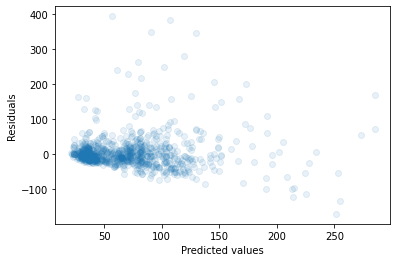

In [19]:
residuals = y_test-y_pred
plt.scatter(y_pred,residuals, alpha=0.1)
plt.ylabel("Residuals")
plt.xlabel("Predicted values")


plt.show()

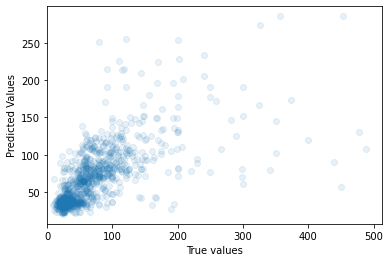

In [20]:
plt.scatter(y_test,y_pred,alpha=0.1)
plt.ylabel("Predicted Values")
plt.xlabel("True values")
plt.xlim(xmin=0)
plt.show()

### PCA

In [21]:
pca = PCA(n_components=18)
X_pca = pca.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

lm =LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)



print ("Score:", model.score(X_test, y_test))

Score: -5.252387885935641e+25


# Feature Engineering distance

In [22]:
gdf= gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude),
                            crs="EPSG:4326")  #convert to geopandas dataframe


UK_gdf=gdf.to_crs(27700) 
UK_gdf=UK_gdf.reset_index(drop='index')  #turn the orignal dataframe into a geodataframe for later use

In [23]:
df_NESW=pd.DataFrame(
    {'Loc': ['North','South','East','West','Centre'],
     'Longitude': [378462.38,449677.95,581528.47,240450.26,461174.61],
     'Latitude': [605104.33,79284.28,269150.36,249155.08,300737.74]})

df_NESW  #a new dataframe with points for the north,south,east,and west in england

,Loc,Longitude,Latitude
0,North,378462.38,605104.33
1,South,449677.95,79284.28
2,East,581528.47,269150.36
3,West,240450.26,249155.08
4,Centre,461174.61,300737.74


In [24]:
gdf_NESW = gpd.GeoDataFrame(
    df_NESW, geometry=gpd.points_from_xy(df_NESW.Longitude, df_NESW.Latitude),  crs={'init':'epsg:27700'}) #convert to gdf

C:\Python36\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [25]:
gdf_NESW=gdf_NESW[['Loc','geometry']]
gdf_NESW=gdf_NESW.set_index('Loc').transpose()
gdf_NESW=gdf_NESW.reset_index(drop='index')       #tidying so we can replicae it


In [26]:
gdf_coords=pd.concat([gdf_NESW]*4815) #use concat to create 4815 columns

In [27]:
gdf_coords=gdf_coords.reset_index() #reset index

## Concat airbnb data with geographic data

In [51]:
UK_gdf['North_loc']=gdf_coords['North']  #add the columns to the orignal data
UK_gdf['South_loc']=gdf_coords['South']
UK_gdf['East_loc']=gdf_coords['East']
UK_gdf['West_loc']=gdf_coords['West']
UK_gdf['Centre_loc']=gdf_coords['Centre']


In [52]:
UK_gdf['North_distance']=UK_gdf['geometry'].distance(UK_gdf['North_loc'])   #calculate distance between point and the others
UK_gdf['South_distance']=UK_gdf['geometry'].distance(UK_gdf['South_loc']) 
UK_gdf['East_distance']=UK_gdf['geometry'].distance(UK_gdf['East_loc']) 
UK_gdf['West_distance']=UK_gdf['geometry'].distance(UK_gdf['West_loc']) 
UK_gdf['Centre_distance']=UK_gdf['geometry'].distance(UK_gdf['Centre_loc']) 

C:\Python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:27700
Right CRS: None

  """Entry point for launching an IPython kernel.
C:\Python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:27700
Right CRS: None

  
C:\Python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:27700
Right CRS: None

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python36\lib\site-packages\ipykernel_

# New Model

In [53]:
UK_gdf.columns #now we have a new variable with the distance to points in the NESW of England

Index(['Unnamed: 0', 'id', 'WD19NM', 'city', 'latitude', 'longitude',
       'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'price',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'reviews_per_month', 'host_is_superhost',
       'amenities', 'has_wifi', 'has_kitchen', 'has_parking', 'has_tv',
       'has_washer', 'has_garden', 'has_balcony', 'FID', 'WD19CD', 'REGD19CD',
       'REGD19NM', 'LAD19CD', 'LAD19NM',
       'Index of Multiple Deprivation (IMD) Score', 'Income Score (rate)',
       'Employment Score (rate)', 'Education, Skills and Training Score',
       'Health Deprivation and Disability Score', 'Crime Score',
       'Barriers to Housing and Services Score', 'Living Environment Score',
       'Income Deprivation Affecting Children Index (IDACI) Score (rate)',
       'Income Deprivation Affecting Older People (IDAOPI) Score (rate)',
       'Children and Young People Sub-domain Score',
       'Adult Skills Sub-domain Score'

In [54]:
features_geographic= UK_gdf.drop(columns=['id','WD19NM', 'latitude', 'longitude','price','Unnamed: 0', 'latitude', 'longitude',
       'property_type', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'reviews_per_month','FID', 'WD19CD', 'REGD19CD',
       'REGD19NM', 'LAD19CD','amenities','Local authority code','Income Score (rate)', 'Employment Score (rate)',
       'Education, Skills and Training Score',
       'Health Deprivation and Disability Score', 'Crime Score',
       'Barriers to Housing and Services Score', 'Living Environment Score',
       'Income Deprivation Affecting Children Index (IDACI) Score (rate)',
       'Income Deprivation Affecting Older People (IDAOPI) Score (rate)',
       'Children and Young People Sub-domain Score',
       'Adult Skills Sub-domain Score',
       'Geographical Barriers Sub-domain Score',
       'Wider Barriers Sub-domain Score', 'Indoors Sub-domain Score',
       'Outdoors Sub-domain Score','Local authority name','city','LAD19NM', 'North_loc', 'South_loc', 'East_loc',
       'West_loc', 'Centre_loc', 'geometry']) #keep columns we need for the features

In [55]:
scaler=StandardScaler()
features_geo_scaled=scaler.fit_transform(X=features_geographic)

In [56]:
X=features_geo_scaled
y=UK_gdf['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
#knn regressor
grid_params= {
    'n_neighbors' :[1,3,5,7,9,12,14,20,40,60,80,100],
    'weights':['distance','uniform'],
    'metric': ['minkowski', 'euclidean','manhattan']
}

grid = GridSearchCV(KNeighborsRegressor(), grid_params, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best estimator: ', grid_result.best_estimator_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.8s


Best Score:  0.4588869363703772
Best estimator:  KNeighborsRegressor(metric='manhattan', n_neighbors=20, weights='distance')
Best Params:  {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   15.7s finished


In [58]:
#linear regression
grid_params= {'fit_intercept':('True', 'False'), 'normalize':('True', 'False'), 'copy_X':('True', 'False')}

grid = GridSearchCV(LinearRegression(), param_grid=grid_params, cv=None)
grid_result = grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print('Best Score: ', grid_result.best_score_)
print('Best estimator: ', grid_result.best_estimator_)
print('Best Params: ', grid_result.best_params_)

r2 / variance :  -2.860236751407692e+22
Best Score:  -2.860236751407692e+22
Best estimator:  LinearRegression(copy_X='True', fit_intercept='True', normalize='True')
Best Params:  {'copy_X': 'True', 'fit_intercept': 'True', 'normalize': 'True'}


In [59]:
knn=KNeighborsRegressor(metric= 'manhattan', n_neighbors= 14, weights= 'uniform')

knn=knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
rmse=mse**(1/2)
rmse 

45.478028550126865

#### Not accurate enough with the added geographic variables, just want to see bristol and manchester by themselves

# KNN Manchester and Bristol Only


### Bristol

In [60]:
Bristol_gdf=UK_gdf[UK_gdf['city']=='Bristol']

In [61]:
features_bristol= Bristol_gdf.drop(columns=['id','WD19NM', 'latitude', 'longitude','price','Unnamed: 0', 'latitude', 'longitude',
       'property_type', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'reviews_per_month','FID', 'WD19CD', 'REGD19CD',
       'REGD19NM', 'LAD19CD','amenities','Local authority code','Income Score (rate)', 'Employment Score (rate)',
       'Education, Skills and Training Score',
       'Health Deprivation and Disability Score', 'Crime Score',
       'Barriers to Housing and Services Score', 'Living Environment Score',
       'Income Deprivation Affecting Children Index (IDACI) Score (rate)',
       'Income Deprivation Affecting Older People (IDAOPI) Score (rate)',
       'Children and Young People Sub-domain Score',
       'Adult Skills Sub-domain Score',
       'Geographical Barriers Sub-domain Score',
       'Wider Barriers Sub-domain Score', 'Indoors Sub-domain Score',
       'Outdoors Sub-domain Score','Local authority name','city','LAD19NM', 'North_loc', 'South_loc', 'East_loc',
       'West_loc', 'Centre_loc', 'geometry']) #keep columns we need for the features

scaler=StandardScaler()
features_bristol_scaled=scaler.fit_transform(X=features_bristol)

In [62]:
X=features_bristol_scaled
y=Bristol_gdf['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
#knn regressor
grid_params= {
    'n_neighbors' :[1,3,5,7,9,12,14,20,40,60,80,100],
    'weights':['distance','uniform'],
    'metric': ['minkowski', 'euclidean','manhattan']
}

grid = GridSearchCV(KNeighborsRegressor(), grid_params, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best estimator: ', grid_result.best_estimator_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s


Best Score:  0.5511214943188459
Best estimator:  KNeighborsRegressor(n_neighbors=14, weights='distance')
Best Params:  {'metric': 'minkowski', 'n_neighbors': 14, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 201 out of 216 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    1.3s finished


In [64]:
knn=KNeighborsRegressor(metric= 'manhattan', n_neighbors= 14, weights= 'uniform')

knn=knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
rmse=mse**(1/2)
rmse 

43.24690747277298

### Manchester


In [65]:
Manchester_gdf=UK_gdf[UK_gdf['city']=='Manchester']

In [66]:
features_manchester= Manchester_gdf.drop(columns=['id','WD19NM', 'latitude', 'longitude','price','Unnamed: 0', 'latitude', 'longitude',
       'property_type', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'reviews_per_month','FID', 'WD19CD', 'REGD19CD',
       'REGD19NM', 'LAD19CD','amenities','Local authority code','Income Score (rate)', 'Employment Score (rate)',
       'Education, Skills and Training Score',
       'Health Deprivation and Disability Score', 'Crime Score',
       'Barriers to Housing and Services Score', 'Living Environment Score',
       'Income Deprivation Affecting Children Index (IDACI) Score (rate)',
       'Income Deprivation Affecting Older People (IDAOPI) Score (rate)',
       'Children and Young People Sub-domain Score',
       'Adult Skills Sub-domain Score',
       'Geographical Barriers Sub-domain Score',
       'Wider Barriers Sub-domain Score', 'Indoors Sub-domain Score',
       'Outdoors Sub-domain Score','Local authority name','city','LAD19NM', 'North_loc', 'South_loc', 'East_loc',
       'West_loc', 'Centre_loc', 'geometry']) #keep columns we need for the features

scaler=StandardScaler()
features_manchester_scaled=scaler.fit_transform(X=features_manchester)

In [67]:
X=features_manchester_scaled
y=Manchester_gdf['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
#knn regressor
grid_params= {
    'n_neighbors' :[1,3,5,7,9,12,14,20,40,60,80,100],
    'weights':['distance','uniform'],
    'metric': ['minkowski', 'euclidean','manhattan']
}

grid = GridSearchCV(KNeighborsRegressor(), grid_params, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best estimator: ', grid_result.best_estimator_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 201 out of 216 | elapsed:    5.5s remaining:    0.3s


Best Score:  0.4470336776558779
Best estimator:  KNeighborsRegressor(metric='manhattan', n_neighbors=14, weights='distance')
Best Params:  {'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    5.8s finished


In [69]:
knn=KNeighborsRegressor(metric='manhattan', n_neighbors=20, weights='distance')

knn=knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
rmse=mse**(1/2)
rmse 

48.42673597056771

# Variable Selection (more specific) and random forest classifer

https://spectrum.ieee.org/computing/software/the-secret-of-airbnbs-pricing-algorithm, inspired by this paper. Apparently number of reviews are important and of course so is wifi


In [70]:
UK_gdf.columns

Index(['Unnamed: 0', 'id', 'WD19NM', 'city', 'latitude', 'longitude',
       'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'price',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'reviews_per_month', 'host_is_superhost',
       'amenities', 'has_wifi', 'has_kitchen', 'has_parking', 'has_tv',
       'has_washer', 'has_garden', 'has_balcony', 'FID', 'WD19CD', 'REGD19CD',
       'REGD19NM', 'LAD19CD', 'LAD19NM',
       'Index of Multiple Deprivation (IMD) Score', 'Income Score (rate)',
       'Employment Score (rate)', 'Education, Skills and Training Score',
       'Health Deprivation and Disability Score', 'Crime Score',
       'Barriers to Housing and Services Score', 'Living Environment Score',
       'Income Deprivation Affecting Children Index (IDACI) Score (rate)',
       'Income Deprivation Affecting Older People (IDAOPI) Score (rate)',
       'Children and Young People Sub-domain Score',
       'Adult Skills Sub-domain Score'

In [115]:
Subset_ran_for=UK_gdf[['accommodates', 'bathrooms', 'bedrooms', 'price',
                       'room_type_Hotel room', 'room_type_Private room',
                      'room_type_Shared room','North_distance',
                       'Centre_distance','host_is_superhost','has_wifi','Crime Score'
                      ,'number_of_reviews','Living Environment Score','Median Price']]

In [119]:
from sklearn.ensemble import RandomForestRegressor


rfr=RandomForestRegressor(n_jobs=-1, oob_score=True)

X=Subset_ran_for.drop(columns='price')
y=Subset_ran_for['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfr.fit(X_train,y_train)


y_pred = rfr.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
rmse=mse**(1/2)
rmse 

47.35769520758566

In [123]:
#knn regressor
grid_params= {
   'bootstrap': [True, False],
   'max_depth': [10, 20, 30, 40, 50],
   'max_features': ['auto', 'sqrt'],
  'min_samples_leaf': [1, 2, 4],
   'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600]
}

grid = GridSearchCV(RandomForestRegressor(), grid_params, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best estimator: ', grid_result.best_estimator_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 23.2min finished


Best Score:  0.5075111155027031
Best estimator:  RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=600)
Best Params:  {'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 600}


Best Score:  0.5075111155027031
Best estimator:  RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=600)
Best Params:  {'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 600}